Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [254]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Osobno\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [255]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [256]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [257]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost modela: 1.0
[ 2.1 -0.5 -0.1]


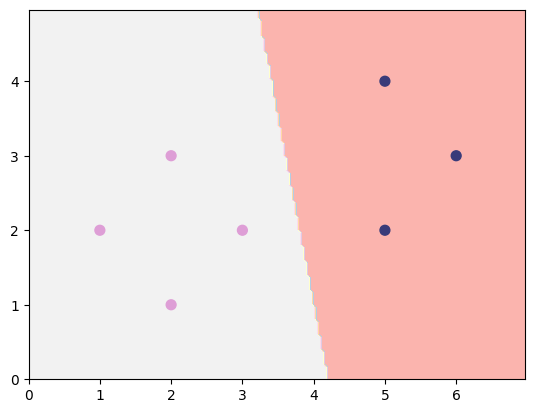

In [258]:

# Vaš kôd ovdje
import numpy as np

rc = RidgeClassifier(alpha=0).fit(seven_X, seven_y)


def h(x): return rc.predict(x) >= 0.5

w = np.array([*rc.intercept_, *rc.coef_[0]])

print("Točnost modela: " + str(accuracy_score(seven_y, rc.predict(seven_X))))
print(w)

plot_2d_clf_problem(seven_X, seven_y, h)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost modela: 1.0
[ 1.55 -0.05]


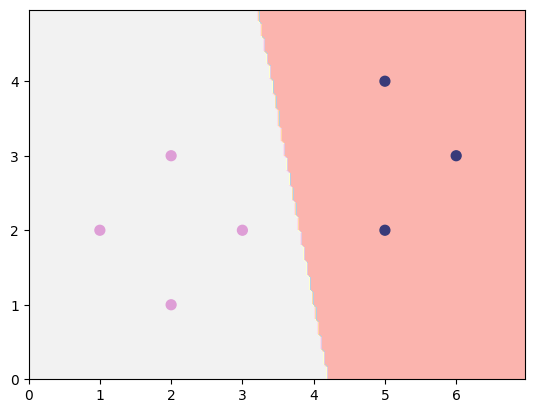

In [259]:
# Vaš kôd ovdje
lr = LinearRegression().fit(seven_X, seven_y)
w = np.array([lr.intercept_, lr.coef_[1]])


def h(x): return lr.predict(x) >= 0.5


h_arr = [(1 if x else 0) for x in h(seven_X)]

print("Točnost modela: " + str(accuracy_score(seven_y, h_arr)))
print(w)

plot_2d_clf_problem(seven_X, seven_y, h)


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [260]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost modela: 0.875
[ 0.84938704 -0.4028021   0.30823117]


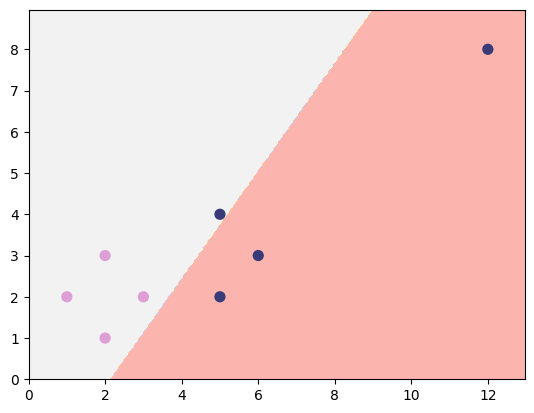

In [261]:
# Vaš kôd ovdje
rc = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)


def h(x): return rc.predict(x) >= 0.5

w = np.array([*rc.intercept_, *rc.coef_[0]])

print("Točnost modela: " + str(accuracy_score(outlier_y, rc.predict(outlier_X))))
print(w)

plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [262]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost modela: 0.875
[ 1.50505051 -0.4040404  -0.08080808]


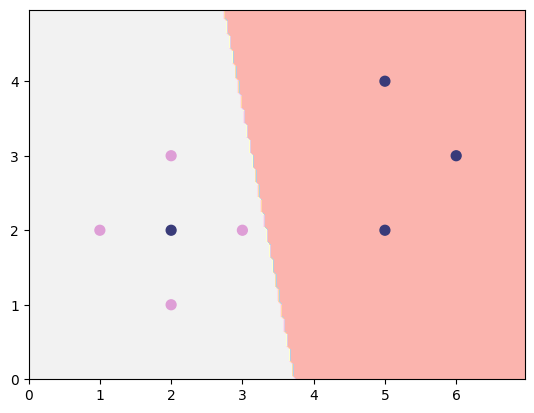

In [263]:
# Vaš kôd ovdje
rc = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)


def h(x): return rc.predict(x) >= 0.5

w = np.array([*rc.intercept_, *rc.coef_[0]])

print("Točnost modela: " + str(accuracy_score(unsep_y, rc.predict(unsep_X))))
print(w)

plot_2d_clf_problem(unsep_X, unsep_y, h)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

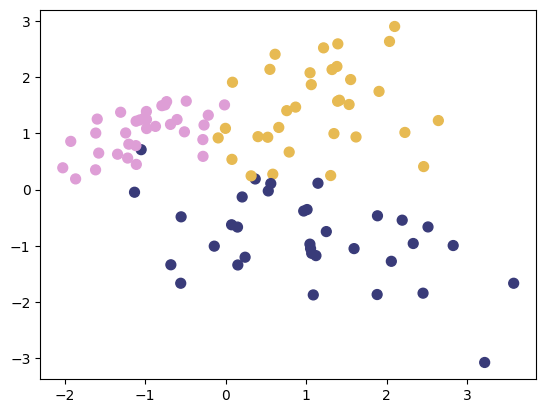

In [264]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X,y=make_classification(n_samples=100, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X,y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'Ridge classifier')

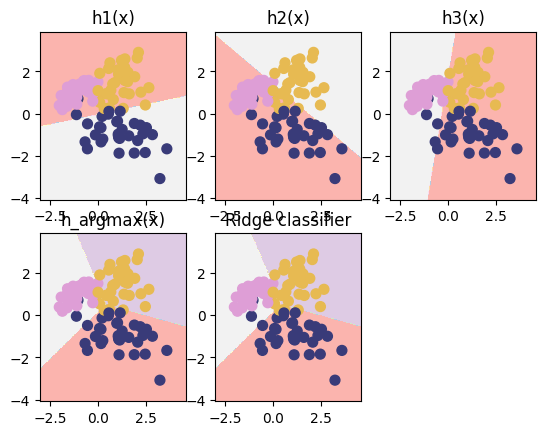

In [265]:
# Vaš kôd ovdje

y1, y2, y3 = [], [], []

# label = 0,1,2,0,1,2,...
for label in y:
    # y1.append(-((-1)**((label+1) % 3)))
    # y2.append(-((-1)**((label) % 3)))
    # y3.append(-((-1)**((label+2) % 3)))
    y1.append(int(label==0))
    y2.append(int(label==1))
    y3.append(int(label==2))

lr1 = LinearRegression().fit(X, y1)
lr2 = LinearRegression().fit(X, y2)
lr3 = LinearRegression().fit(X, y3)

def h1(x): return lr1.predict(x) >= 0.5
def h2(x): return lr2.predict(x) >= 0.5
def h3(x): return lr3.predict(x) >= 0.5

plt.subplot(2,3,1)
plot_2d_clf_problem(X, y, h1)
plt.title('h1(x)')
plt.subplot(2,3,2)
plot_2d_clf_problem(X, y, h2)
plt.title('h2(x)')
plt.subplot(2,3,3)
plot_2d_clf_problem(X, y, h3)
plt.title('h3(x)')

h_argmax = lambda x: np.argmax([lr1.predict(x.reshape(1, 2)), lr2.predict(x.reshape(1, 2)), lr3.predict(x.reshape(1, 2))])
plt.subplot(2, 3, 4)
plot_2d_clf_problem(X, y, h_argmax)
plt.title('h_argmax(x)')

plt.subplot(2,3,5)
rc = RidgeClassifier(alpha=0).fit(X, y)
def h(x): return rc.predict(x)

plot_2d_clf_problem(X, y, h)
plt.title('Ridge classifier')

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

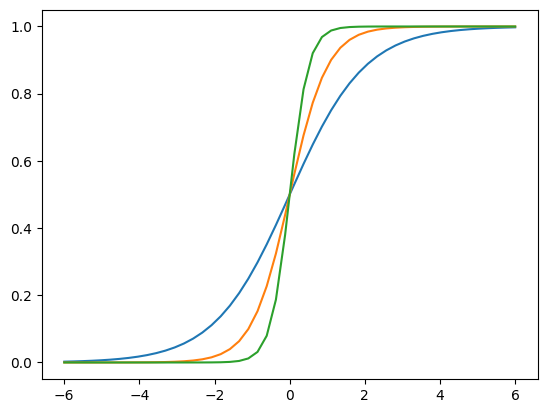

In [266]:
# Vaš kôd ovdje
def sigm(x,alpha=1): return 1/(1 + np.exp(-alpha*x))

alpha = [1, 2, 4]
x = np.linspace(-6, 6)

for i in alpha:
    plt.plot(x, sigm(x, i), label="alpha="+str(i))


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [275]:
from numpy import linalg

from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.metrics import log_loss


def lr_h(x, w):
    fi = PolyFeat(1).fit_transform(x.reshape(1, -1))
    return sigm(fi.dot(w))


def cross_entropy_loss(h, y):
    return -y * np.log(h) - (1 - y) * np.log(1 - h)


def cross_entropy_error(X, y, w):
    fi = PolyFeat(1).fit_transform(X)
    return log_loss(y, sigm(fi.dot(w)))


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):

    # Vaš kôd ovdje
    w_traced = []
    w = np.zeros(np.shape(X)[1] + 1)
    N = len(X)
    prev_error = None
    first_iter = True

    for i in range(0, max_iter):
        dw = np.zeros(np.shape(X)[1])
        dw0 = 0
        error = 0
        for j in range(0, N):
            h = lr_h(X[j], w)
            dw += (h - y[j])*X[j]
            dw0 += h - y[j]
            error += cross_entropy_loss(h, y[j])
        
        if first_iter:
            first_iter = False
            prev_error = error
        elif abs(prev_error - error) < epsilon:
            break
        else:
            prev_error = error

        w[0] -= eta * dw0
        w[1:] = w[1:] * (1 - eta*alpha) - eta * dw

        w_traced.extend(w)

    if trace:
        return (w, w_traced)
    else:
        return w


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [273]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [276]:
# Vaš kôd ovdje
w = lr_train(seven_X, seven_y)
print('Pogreška unakrsne entropije: ', cross_entropy_error(seven_X, seven_y, w))
print(w)


def h(x): return lr_h(x, w) >= 0.5


plot_2d_clf_problem(seven_X, seven_y, h)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [228]:
from sklearn.metrics import zero_one_loss

[ 6.44150959 -2.11012128  0.53522851]


Text(0.5, 1.0, 'Pogreška u.e. u ovisnosti o eta')

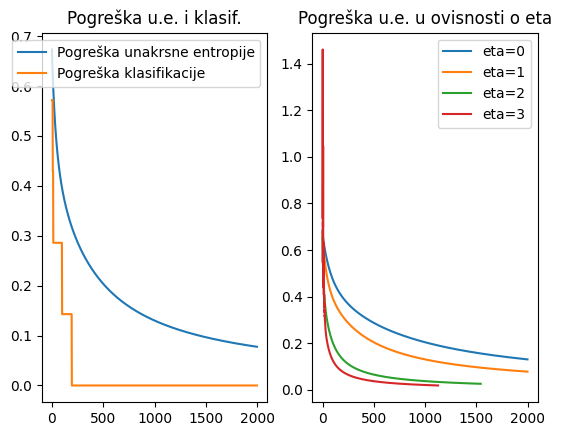

In [229]:
# Vaš kôd ovdje
w, w_traced = lr_train(seven_X, seven_y, trace=True)
print(w)

fi = PolyFeat(1).fit_transform(seven_X)
def h(x): return x >= 0.5


cross_val_error = []
classif_error = []

for i in range(0, len(w_traced), 3):
    cross_val_error.append(cross_entropy_error(
        seven_X, seven_y, w_traced[i:i+3]))
    classif_error.append(zero_one_loss(
        seven_y, h(sigm(fi.dot(w_traced[i:i+3])))))

train_step_error = []

eta = [0.005, 0.01, 0.05, 0.1]
for i in eta:
    error = []
    w, w_traced = lr_train(seven_X, seven_y, i, trace=True)

    for j in range(0, len(w_traced), 3):
        error.append(cross_entropy_error(seven_X, seven_y, w_traced[j:j+3]))

    train_step_error.append(error)

plt.subplot(1, 2, 1)
plt.plot(cross_val_error, label="Pogreška unakrsne entropije")
plt.plot(classif_error, label="Pogreška klasifikacije")
plt.legend(loc="upper right")
plt.title("Pogreška u.e. i klasif.")

plt.subplot(1, 2, 2)
for i in range(0, len(eta)):
    plt.plot(train_step_error[i], label="eta=" + str(i))
plt.legend(loc="upper right")
plt.title("Pogreška u.e. u ovisnosti o eta")



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

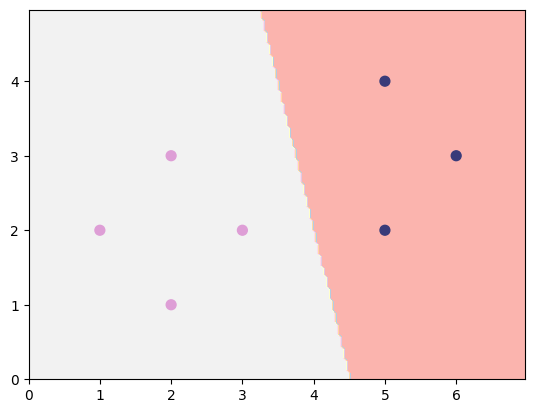

In [230]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
lr = LogisticRegression(tol=0.0001, C=1, max_iter=2000).fit(seven_X,seven_y)
h = lambda x : lr.predict(x)

plot_2d_clf_problem(seven_X,seven_y, h)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [231]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

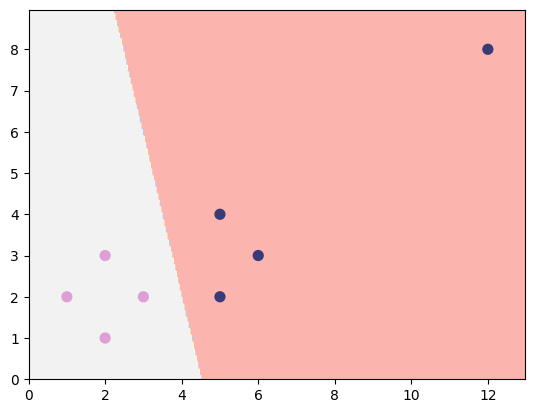

In [232]:
# Vaš kôd ovdje
lr = LogisticRegression(tol=0.0001, C=1, max_iter=2000).fit(seven_X, seven_y)
def h(x): return lr.predict(x)


plot_2d_clf_problem(outlier_X, outlier_y, h)


**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Text(0.5, 1.0, 'Vrijednosti težina')

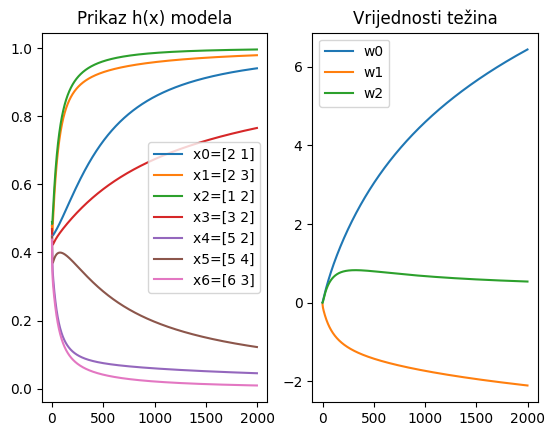

In [233]:
# Vaš kôd ovdje
w, w_traced = lr_train(seven_X, seven_y, trace=True)

w0, w1, w2 = [], [], []

for i in range(0, len(w_traced), 3):
    w0.append(w_traced[i])
    w1.append(w_traced[i+1])
    w2.append(w_traced[i+2])

h_arr = []

for i in range(0, len(seven_X)):
    h = []

    for j in range(0, len(w_traced), 3):
        h.append(lr_h(seven_X[i], w_traced[j:j+3]))
    h_arr.append(h)

plt.subplot(1, 2, 1)
for i in range(0, len(h_arr)):
    plt.plot(h_arr[i], label="x{0}={1}".format(i, str(seven_X[i])))

plt.title("Prikaz h(x) modela")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(w0, label="w0")
plt.plot(w1, label="w1")
plt.plot(w2, label="w2")
plt.legend(loc='best')
plt.title("Vrijednosti težina")


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [234]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Text(0.5, 1.0, 'Vrijednosti težina')

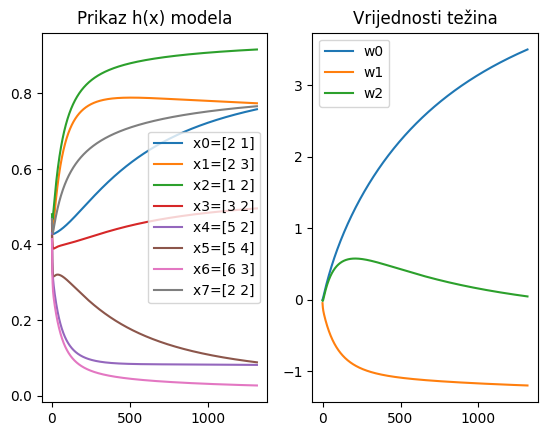

In [235]:
# Vaš kôd ovdje
w, w_traced = lr_train(unsep_X, unsep_y, trace=True)

w0, w1, w2 = [], [], []

for i in range(0, len(w_traced), 3):
    w0.append(w_traced[i])
    w1.append(w_traced[i+1])
    w2.append(w_traced[i+2])

h_arr = []

for i in range(0, len(unsep_X)):
    h = []

    for j in range(0, len(w_traced), 3):
        h.append(lr_h(unsep_X[i], w_traced[j:j+3]))
    h_arr.append(h)

plt.subplot(1, 2, 1)
for i in range(0, len(h_arr)):
    plt.plot(h_arr[i], label="x{0}={1}".format(i, str(unsep_X[i])))

plt.title("Prikaz h(x) modela")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(w0, label="w0")
plt.plot(w1, label="w1")
plt.plot(w2, label="w2")
plt.legend(loc='best')
plt.title("Vrijednosti težina")


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [236]:
from numpy.linalg import norm

Text(0.5, 1.0, 'L2 norma vektora w')

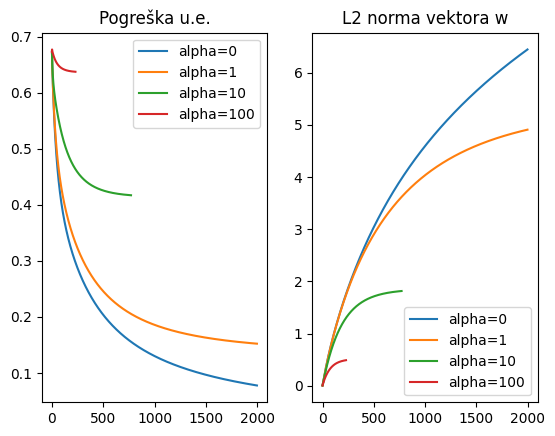

In [237]:
# Vaš kôd ovdje
alpha = [0, 1, 10, 100]

error_arr, L2_norm_arr = [], []

for a in alpha:
    w, w_traced = lr_train(seven_X, seven_y, alpha=a, trace=True)
    err, L2_norm = [], []

    for k in range(0, len(w_traced), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w_traced[k:k+3]))
        L2_norm.append(norm(w_traced[k:k+1]))

    error_arr.append(err)
    L2_norm_arr.append(L2_norm)

plt.subplot(1, 2, 1)
for i in range(0, len(error_arr)):
    plt.plot(error_arr[i], label="alpha=" + str(alpha[i]))

plt.legend(loc='best')
plt.title("Pogreška u.e.")

plt.subplot(1, 2, 2)
for i in range(0, len(error_arr)):
    plt.plot(L2_norm_arr[i], label="alpha=" + str(alpha[i]))

plt.legend(loc='best')
plt.title("L2 norma vektora w")


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [238]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

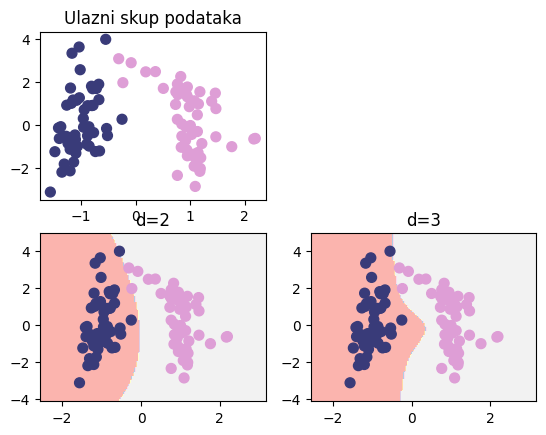

In [240]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
[X, y] = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

plt.subplot(2, 2, 1)
plot_2d_clf_problem(X, y)
plt.title("Ulazni skup podataka")

for i in [2, 3]:
    plt.subplot(2, 2, i+1)
    poly = PolyFeat(i)
    fi = poly.fit_transform(X)

    lr = LogisticRegression().fit(fi, y)

    plot_2d_clf_problem(X, y, lambda x : lr.predict(poly.transform(x)))
    plt.title("d=" + str(i))


**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?